In [54]:
# 2019202033 - Mugilan E.S.

In [55]:
# BiVariate Analysis Demo - http://www.cs.toronto.edu/~mhsadi/code-repository/MachineLearningNotebooks/3-SUVDataset.html

In [56]:
datasets_folder = "../../datasets"

In [57]:
import sklearn
import pandas as pd
import seaborn as sb
import matplotlib as mpl
%matplotlib inline

In [58]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [59]:
df = pd.read_csv(f'{datasets_folder}/suv_data.csv')

In [60]:
df.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [61]:
df.shape

(400, 5)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [63]:
df.groupby('Purchased').size()

Purchased
0    257
1    143
dtype: int64

In [64]:
cleaned_data_set = df.drop(columns=['User ID'], axis='1')

In [65]:
cleaned_data_set.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [66]:
cleaned_data_set.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<AxesSubplot:xlabel='Purchased', ylabel='count'>

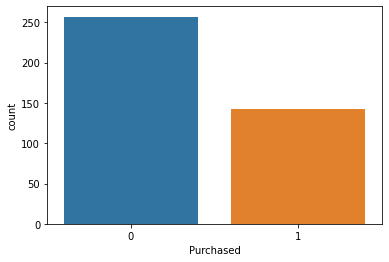

In [67]:
sb.countplot(x='Purchased', data=cleaned_data_set)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

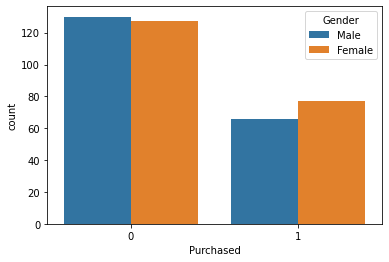

In [68]:
sb.countplot(x='Purchased', hue='Gender', data=cleaned_data_set)

<AxesSubplot:>

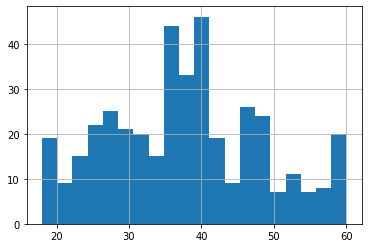

In [69]:
df['Age'].hist(bins=20)

In [70]:
age_category=[]
for i in range(0, len(df['Age'])):
    if cleaned_data_set['Age'][i] <= 20:
        age_category.append('A');
    elif 20 < cleaned_data_set['Age'][i] <= 26:
        age_category.append('B');
    elif 26 < cleaned_data_set['Age'][i] <= 30:
        age_category.append('C');
    elif 30 < cleaned_data_set['Age'][i] <= 40:
        age_category.append('D');
    elif 40 < cleaned_data_set['Age'][i] <= 50:
        age_category.append('E');
    else:
        age_category.append('F');

age_data_frame = pd.DataFrame(data=age_category, columns=['AgeCategory'])
augmented_data_set = pd.concat([cleaned_data_set, age_data_frame], axis=1)
augmented_data_set.head()

,Gender,Age,EstimatedSalary,Purchased,AgeCategory
0,Male,19,19000,0,A
1,Male,35,20000,0,D
2,Female,26,43000,0,B
3,Female,27,57000,0,C
4,Male,19,76000,0,A


<AxesSubplot:xlabel='Purchased', ylabel='count'>

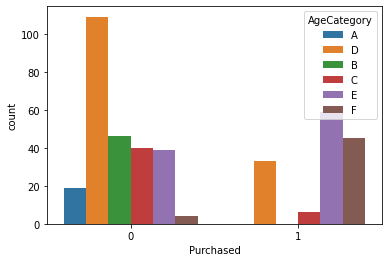

In [71]:
sb.countplot(x='Purchased', hue='AgeCategory', data=augmented_data_set)

<AxesSubplot:>

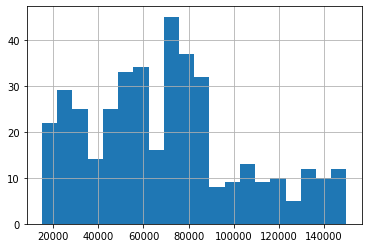

In [72]:
df['EstimatedSalary'].hist(bins = 20)

In [73]:
income_category=[]
for i in range (0, len(df['EstimatedSalary'])):
    if cleaned_data_set['EstimatedSalary'][i] <= 19500:
        income_category.append('Very Low');
    elif 19500 < cleaned_data_set['EstimatedSalary'][i] <= 40000:
        income_category.append('Low');
    elif 40000 < cleaned_data_set['EstimatedSalary'][i] <= 60000:
        income_category.append('Moderately Low');
    elif 60000 < cleaned_data_set['EstimatedSalary'][i] <= 80000:
        income_category.append('Medium');
    elif 80000 < cleaned_data_set['EstimatedSalary'][i] <= 100000:
        income_category.append('Moderately high');
    elif 100000 < cleaned_data_set['EstimatedSalary'][i] <= 130000:
        income_category.append('Very High');
    elif 130000 < cleaned_data_set['EstimatedSalary'][i] <= 145000:
        income_category.append('Very High');
    else:
        income_category.append('Extremely High');

income_data_frame = pd.DataFrame(data=income_category, columns=['IncomeCategory'])
augmented_data_set_2 = pd.concat([augmented_data_set, income_data_frame], axis=1)
augmented_data_set_2.head()

,Gender,Age,EstimatedSalary,Purchased,AgeCategory,IncomeCategory
0,Male,19,19000,0,A,Very Low
1,Male,35,20000,0,D,Low
2,Female,26,43000,0,B,Moderately Low
3,Female,27,57000,0,C,Moderately Low
4,Male,19,76000,0,A,Medium


<AxesSubplot:xlabel='Purchased', ylabel='count'>

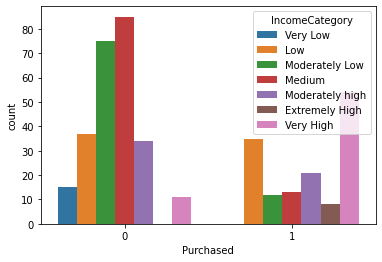

In [74]:
sb.countplot(x='Purchased', hue='IncomeCategory', data=augmented_data_set_2)

In [75]:
binary_gender=pd.get_dummies(augmented_data_set_2['Gender'], drop_first=True)
binary_gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [76]:
binary_age = pd.get_dummies(augmented_data_set_2['AgeCategory'])
binary_age.head()

,A,B,C,D,E,F
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,1,0,0,0,0,0


In [77]:
binary_income = pd.get_dummies(augmented_data_set_2['IncomeCategory'])
binary_income.head()

,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0


In [78]:
final_data_set = pd.concat([augmented_data_set_2, binary_age, binary_gender, binary_income], axis=1)
final_data_set_1 = final_data_set.drop(columns=['Age', 'Gender', 'EstimatedSalary', 'IncomeCategory', 'AgeCategory'], axis=1)
final_data_set_1.head ()

,Purchased,A,B,C,D,E,F,Male,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [79]:
Y = final_data_set_1['Purchased']
X = final_data_set_1.drop(columns=['Purchased'], axis=1)

In [80]:
X.head()

,A,B,C,D,E,F,Male,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [81]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [82]:
test_set_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_set_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [83]:
predictions = model.predict(X_test)

In [84]:
report = classification_report(Y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        58
           1       0.91      0.91      0.91        22

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



In [85]:
print(confusion_matrix(Y_test, predictions))

[[56  2]
 [ 2 20]]


In [86]:
accuracy_score(Y_test, predictions)

0.95

In [87]:
Y = df.iloc[:, 4]
X = df.iloc[:, 2:4]

In [88]:
print(X.head())

   Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000


In [89]:
print(Y.head())

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


In [90]:
test_set_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_set_size, random_state=seed)

In [91]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [92]:
classifier = LogisticRegression(random_state=seed, solver='liblinear')
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [93]:
predictions = classifier.predict(X_test)

In [94]:
report = classification_report(Y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        58
           1       0.76      0.86      0.81        22

    accuracy                           0.89        80
   macro avg       0.85      0.88      0.86        80
weighted avg       0.89      0.89      0.89        80



In [95]:
accuracy_score(Y_test, predictions)

0.8875